# Curs 3: Pachetul Pandas, reprezentari grafice

## 3.1. Pandas

Desi NumPy are facilitati pentru incarcarea de date in format CSV, se prefera in practica utilizarea pachetului Pandas:

In [2]:
import pandas as pd
pd.__version__

import numpy as np

### Pandas Series

O serie Pandas este un vector unidimensional de date indexate. 

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Valorile se obtin folosind atributul values, returnand un NumPy array:

In [4]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

Indexul se obtine prin atributul index. In cadrul unui obiect `Series` sau al unui `DataFrame` este util pentru adresarea datelor.

In [5]:
data.index

RangeIndex(start=0, stop=4, step=1)

Specificarea unui index pentru o serie se poate face la instantiere:

In [6]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])

In [7]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [8]:
data.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [9]:
data['b']

0.5

Analogia dintre un obiect `Series` si un dictionar clasic Python poate fi speculata in crearea unui obiect Series plecand de la un dictionar:

In [10]:
geografie_populatie = {'Romania': 19638000, 'Franta': 67201000, 'Grecia': 11183957}
populatie = pd.Series(geografie_populatie)
populatie

Franta     67201000
Grecia     11183957
Romania    19638000
dtype: int64

In [11]:
populatie.index

Index(['Franta', 'Grecia', 'Romania'], dtype='object')

In [12]:
populatie['Grecia']

11183957

In [13]:
# populatie['Germania'] 
# eroare: KeyError: 'Germania'

Daca nu se specifica un index la crearea unui obiect `Series`, atunci implicit acesta va fi format pe baza secventei de intregi 0, 1, 2, ...

Nu e obligatoriu ca o serie sa contina doar valori numerice:

In [14]:
s1 = pd.Series(['rosu', 'verde', 'galben', 'albastru'])
print(s1)
print('s1[2]=', s1[2])

0        rosu
1       verde
2      galben
3    albastru
dtype: object
s1[2]= galben


### Selectarea datelor in serii

Datele dintr-o serie pot fi referite prin intermediul indexului:

In [15]:
data = pd.Series(np.linspace(0, 75, 4), index=['a', 'b', 'c', 'd'])
print(data)
data['b']

a     0.0
b    25.0
c    50.0
d    75.0
dtype: float64


25.0

Se poate face modificarea datelor dintr-o serie folosind indexul:

In [16]:
data['b'] = 300
print(data)

a      0.0
b    300.0
c     50.0
d     75.0
dtype: float64


Se poate folosi slicing:

In [17]:
data['a':'c']

a      0.0
b    300.0
c     50.0
dtype: float64

sau se pot folosi expresii logice:

In [18]:
data[(data > 30) & (data < 70)] #se remarca returnarea in rezultat a indicilor care satisfac proprietatea ceruta

c    50.0
dtype: float64

Se prefera folosirea urmatoarelor atribute de indexare: `loc`, `iloc`. Indexarea prin `ix`, daca se regaseste prin tutoriale mai vechi, se considera a fi sursa de confuzie si se recomanda evitarea ei.

Atributul `loc` permite indicierea folosind valoarea de index. 

In [19]:
data = pd.Series([1, 2, 3], index=['a', 'b', 'c'])

data

a    1
b    2
c    3
dtype: int64

In [20]:
#cautare dupa index cu o singura valoare
data.loc['b']

2

In [21]:
#cautare dupa index cu o doua valori. Lista interioara este folosita pentru a stoca o colectie de valori de indecsi.
data.loc[['a', 'c']]

a    1
c    3
dtype: int64

Atributul `iloc` este folosit pentru a face referire la linii dupa pozitia (numarul) lor. Numerotarea incepe de la 0. 

In [22]:
data.iloc[0]

1

In [23]:
data.iloc[[0, 2]]

a    1
c    3
dtype: int64

### DataFrame

Un obiect `DataFrame` este o colectie de coloane de tip `Series`. Numarul de elemente din fiecare serie este acelasi. 

In [24]:
geografie_suprafata = {'Romania': 238397, 'Franta': 640679, 'Grecia': 131957}

geografie_moneda = {'Romania': 'RON', 'Franta': 'EUR', 'Grecia': 'EUR'}

geografie = pd.DataFrame({'Populatie' : geografie_populatie, 'Suprafata' : geografie_suprafata, 'Moneda' : geografie_moneda})

print(geografie)

        Moneda  Populatie  Suprafata
Franta     EUR   67201000     640679
Grecia     EUR   11183957     131957
Romania    RON   19638000     238397


In [25]:
print(geografie.index)

Index(['Franta', 'Grecia', 'Romania'], dtype='object')


Atributul `columns` da lista de coloane:

In [26]:
geografie.columns

Index(['Moneda', 'Populatie', 'Suprafata'], dtype='object')

Referirea la o serie care compune o coloana din DataFrame se face astfel

In [27]:
print(geografie['Populatie'])
print('*********************')
print(type(geografie['Populatie']))

Franta     67201000
Grecia     11183957
Romania    19638000
Name: Populatie, dtype: int64
*********************
<class 'pandas.core.series.Series'>


Crearea unui obiect DataFrame se poate face pornind si de la o singura serie:

In [28]:
mydf = pd.DataFrame([1, 2, 3], columns=['values'])
mydf

,values
0,1
1,2
2,3


... sau se poate crea pornind de la o lista de dictionare:

In [29]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Daca lipsesc chei din vreunul din dictionare, respectiva valoare se va umple cu 'NaN'.

In [30]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


Instantierea unui DataFrame se poate face si de la un NumPy array:

In [31]:
pd.DataFrame(np.random.rand(3, 2), columns=['Col1', 'Col2'], index=['a', 'b', 'c'])

,Col1,Col2
a,0.442199,0.529896
b,0.304790,0.871684
c,0.674132,0.644213


Se poate adauga o coloana noua la un DataFrame, similar cu adaugarea unui element (cheie, valoare) la un dictionar: 

In [32]:
geografie['Densitatea populatiei'] = geografie['Populatie'] / geografie['Suprafata']

geografie

,Moneda,Populatie,Suprafata,Densitatea populatiei
Franta,EUR,67201000,640679,104.890280
Grecia,EUR,11183957,131957,84.754556
Romania,RON,19638000,238397,82.375198


Un obiect DataFrame poate fi transpus cu atributul `T`:

In [33]:
geografie.T

,Franta,Grecia,Romania
Moneda,EUR,EUR,RON
Populatie,67201000,11183957,19638000
Suprafata,640679,131957,238397
Densitatea populatiei,104.89,84.7546,82.3752


### Selectarea datelor intr-un `DataFrame`

S-a demonstrat posibilitatea de referire dupa numele de coloana:

In [34]:
print(geografie)

        Moneda  Populatie  Suprafata  Densitatea populatiei
Franta     EUR   67201000     640679             104.890280
Grecia     EUR   11183957     131957              84.754556
Romania    RON   19638000     238397              82.375198


In [35]:
print(geografie['Moneda'])

Franta     EUR
Grecia     EUR
Romania    RON
Name: Moneda, dtype: object


Daca numele unei coloane este un string fara spatii, se poate folosi acesta ca un atribut:

In [36]:
geografie.Moneda

Franta     EUR
Grecia     EUR
Romania    RON
Name: Moneda, dtype: object

Se poate face referire la o coloana dupa indicele ei, indirect:

In [37]:
geografie[geografie.columns[0]]

Franta     EUR
Grecia     EUR
Romania    RON
Name: Moneda, dtype: object

Pentru cazul in care un DataFrame nu are nume de coloana, ele sunt implicit intregii 0, 1, ... si se pot folosi pentru selectarea de coloana folosind paranteze drepte:

In [38]:
my_data = pd.DataFrame(np.random.rand(3, 4))

my_data

,0,1,2,3
0,0.221784,0.247174,0.638207,0.378383
1,0.123767,0.946627,0.445961,0.750850
2,0.126007,0.210505,0.973760,0.417442


In [39]:
my_data[0]

0    0.221784
1    0.123767
2    0.126007
Name: 0, dtype: float64

Atributul `values` returneaza un obiect ndarray continand valori. Tipul unui ndarray este cel mai specializat tip de date care poate sa contina valorile din DataFrame:

In [40]:
#afisare ndarray si tip pentru my_data.values
print(my_data.values)
print(my_data.values.dtype)

[[0.22178389 0.24717434 0.63820719 0.37838297]
 [0.12376674 0.94662712 0.44596079 0.75084956]
 [0.1260068  0.21050518 0.97375989 0.41744175]]
float64


In [41]:
#afisare ndarray si tip pentru geografie.values
print(geografie.values)
print(geografie.values.dtype)

[['EUR' 67201000 640679 104.89028046806591]
 ['EUR' 11183957 131957 84.75455640852702]
 ['RON' 19638000 238397 82.37519767446739]]
object


Indexarea cu `iloc` in cazul unui obiect `DataFrame` permite precizarea a doua valori: prima reprezinta linia si al doilea coloana, numerotate de la 0. Pentru linie si coloana se poate folosi si slicing:

In [42]:
print(geografie)

geografie.iloc[0:2, 2:4]

        Moneda  Populatie  Suprafata  Densitatea populatiei
Franta     EUR   67201000     640679             104.890280
Grecia     EUR   11183957     131957              84.754556
Romania    RON   19638000     238397              82.375198


,Suprafata,Densitatea populatiei
Franta,640679,104.890280
Grecia,131957,84.754556


Indexarea cu `loc` permite precizarea valorilor de indice si respectiv nume de coloana:

In [43]:
print(geografie)

geografie.loc[['Franta', 'Romania'], 'Populatie':'Densitatea populatiei']

        Moneda  Populatie  Suprafata  Densitatea populatiei
Franta     EUR   67201000     640679             104.890280
Grecia     EUR   11183957     131957              84.754556
Romania    RON   19638000     238397              82.375198


,Populatie,Suprafata,Densitatea populatiei
Franta,67201000,640679,104.890280
Romania,19638000,238397,82.375198


Se permite folosirea de expresii de filtrare à la NumPy:

In [44]:
geografie.loc[geografie['Densitatea populatiei'] > 83, ['Populatie', 'Moneda']]

,Populatie,Moneda
Franta,67201000,EUR
Grecia,11183957,EUR


Folosind indicierea, se pot modifica valorile dintr-un `DataFrame`:

In [45]:
#Modificarea populatiei Greciei cu iloc
geografie.iloc[1, 1] = 12000000
print(geografie)

        Moneda  Populatie  Suprafata  Densitatea populatiei
Franta     EUR   67201000     640679             104.890280
Grecia     EUR   12000000     131957              84.754556
Romania    RON   19638000     238397              82.375198


In [46]:
#Modificarea populatiei Greciei cu loc
geografie.loc['Grecia', 'Populatie'] = 11183957
print(geografie) 

        Moneda  Populatie  Suprafata  Densitatea populatiei
Franta     EUR   67201000     640679             104.890280
Grecia     EUR   11183957     131957              84.754556
Romania    RON   19638000     238397              82.375198


Precizari:
1. daca se foloseste un singur indice la un DataFrame, atunci se considera ca se face referire la coloana:
```Python
geografie['Moneda']
```
1. daca se foloseste slicing, acesta se refera la liniile din DataFrame:
```Python
geografie['Franta':'Romania']
```
1. operatiile logice se considera ca refera de asemenea linii din DataFrame:
```Python
geografie[geografie['Densitatea populatiei'] > 83]
```

In [47]:
geografie[geografie['Densitatea populatiei'] > 83]

,Moneda,Populatie,Suprafata,Densitatea populatiei
Franta,EUR,67201000,640679,104.890280
Grecia,EUR,11183957,131957,84.754556


## Operarea pe date

Se pot aplica functii NumPy peste obiecte Series si DataFrame. Rezultatul este de acelasi tip ca obiectul peste care se aplica iar indicii se pastreaza:

In [48]:
ser = pd.Series(np.random.randint(low=0, high=10, size=(5)), index=['a', 'b', 'c', 'd', 'e'])
ser

a    7
b    9
c    8
d    5
e    4
dtype: int32

In [49]:
np.exp(ser)

a    1096.633158
b    8103.083928
c    2980.957987
d     148.413159
e      54.598150
dtype: float64

In [50]:
my_df = pd.DataFrame(data=np.random.randint(low=0, high=10, size=(3, 4)), \
                     columns=['Sunday', 'Monday', 'Tuesday', 'Wednesday'], \
                    index=['a', 'b', 'c'])
print('Originar:', my_df)
print('Transformat:', np.exp(my_df))

Originar:    Sunday  Monday  Tuesday  Wednesday
a       2       5        8          3
b       2       6        3          1
c       7       9        0          7
Transformat:         Sunday       Monday      Tuesday    Wednesday
a     7.389056   148.413159  2980.957987    20.085537
b     7.389056   403.428793    20.085537     2.718282
c  1096.633158  8103.083928     1.000000  1096.633158


Pentru functii binare se face alinierea obiectelor Series sau DataFrame dupa indexul lor. Aceasta poate duce la operare cu valori NaN si in consecinta obtinere de valori NaN.

In [51]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662, 'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127}, name='population')

In [52]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In cazul unui DataFrame, alinierea se face atat pentru coloane, cat si pentru indecsii folositi la linii:

In [53]:
A = pd.DataFrame(data=np.random.randint(0, 10, (2, 3)), columns=list('ABC'))
B = pd.DataFrame(data=np.random.randint(0, 10, (3, 2)), columns=list('BA'))

A

,A,B,C
0,7,4,5
1,9,8,3


In [54]:
B

,B,A
0,7,8
1,7,6
2,2,2


In [55]:
A + B

,A,B,C
0,15.0,11.0,NaN
1,15.0,15.0,NaN
2,NaN,NaN,NaN


Daca se doreste umplerea valorilor NaN cu altceva, se poate specifica parametrul fill_value pentru functii care implementeaza operatiile aritmetice:


| Operator      | Metoda Pandas|
| ------------- |--------------|
| +             | `add()`     |
| -             | `sub()`, `substract()`|
| *             | `mul()`, `multiply()` |
|/              | `truediv()`, `div()`, `divide()`|
|//             | `floordiv()`|
|%              | `mod()`     |
|**|`pow()`|
-------------------
Daca ambele pozitii au valori lipsa (NaN), atunci [valoarea finala va fi si ea lipsa](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.add.html).

Exemplu:

In [56]:
A

,A,B,C
0,7,4,5
1,9,8,3


In [57]:
B

,B,A
0,7,8
1,7,6
2,2,2


In [58]:
A.add(B, fill_value=0)

,A,B,C
0,15.0,11.0,5.0
1,15.0,15.0,3.0
2,2.0,2.0,NaN


## Valori lipsa

Pentru cazul in care valorile dintr-o coloana a unui obiect DataFrame sunt de tip numeric, valorile lipsa se reprezinta prin NaN - care e suportat doar de tipurile in virgula mobila, nu si de intregi; aceasta din ultima observatie arata ca numerele intregi sunt convertite la floating point daca intr-o lista care le contine se afla si valori lipsa:

In [59]:
my_series = pd.Series([1, 2, 3, None, 5], name='my_series')
#echivalent:
my_series = pd.Series([1, 2, 3, np.NaN, 5], name='my_series')
my_series

0    1.0
1    2.0
2    3.0
3    NaN
4    5.0
Name: my_series, dtype: float64

Functiile care se pot folosi pentru un DataFrame pentru a operare cu valori lipsa sunt:


In [60]:
df = pd.DataFrame([[1, 2, np.NaN], [np.NAN, 10, 20]])
df

,0,1,2
0,1.0,2,NaN
1,NaN,10,20.0


`isnull()` - returneaza o masca de valori logice, cu `True` (`False`) pentru pozitiile unde se afla valori nule (respectiv: nenule); nul = valoare lipsa.  

In [61]:
df.isnull()

,0,1,2
0,False,False,True
1,True,False,False


`notnull()` - opusul functiei precedente

`dropna()` - returneaza o varianta filtrata a obiectuilui DataFrame. E posibil sa duca la un DataFrame gol. 

In [62]:
df.dropna()

,0,1,2


In [63]:
df.iloc[0] = [3, 4, 5]
print(df)
df.dropna()

     0   1     2
0  3.0   4   5.0
1  NaN  10  20.0


,0,1,2
0,3.0,4,5.0


`fillna()` umple valorile lipsa dupa o anumita politica:

In [64]:
df = pd.DataFrame([[1, 2, np.NaN], [np.NAN, 10, 20]])
df

,0,1,2
0,1.0,2,NaN
1,NaN,10,20.0


In [65]:
#umplere de NaNuri cu valoare constanta
df2 = df.fillna(value = 100)
df2

,0,1,2
0,1.0,2,100.0
1,100.0,10,20.0


In [66]:
#umplere de NaNuri cu media pe coloana corespunzatoare
df = pd.DataFrame(data = np.random.randn(5, 3), columns=['A', 'B', 'C'])
df.iloc[0, 2] = df.iloc[1, 1] = df.iloc[2, 0] = df.iloc[4, 1] = np.NAN
df

,A,B,C
0,2.430595,-0.362427,NaN
1,0.294996,NaN,-0.862191
2,NaN,-0.026776,-0.033644
3,-0.479817,-0.316418,-1.424829
4,0.622230,NaN,0.195453


In [67]:
#calcul medie pe coloana
df.mean(axis=0)

A    0.717001
B   -0.235207
C   -0.531303
dtype: float64

In [68]:
df3 = df.fillna(df.mean(axis=0))
df3

,A,B,C
0,2.430595,-0.362427,-0.531303
1,0.294996,-0.235207,-0.862191
2,0.717001,-0.026776,-0.033644
3,-0.479817,-0.316418,-1.424829
4,0.622230,-0.235207,0.195453


Exista un parametru al functiei `fillna()` care permite [umplerea valorilor lipsa prin copiere](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html): 

In [69]:
my_ds = pd.Series(np.arange(0, 30))
my_ds[1:-1:4] = np.NaN
my_ds

0      0.0
1      NaN
2      2.0
3      3.0
4      4.0
5      NaN
6      6.0
7      7.0
8      8.0
9      NaN
10    10.0
11    11.0
12    12.0
13     NaN
14    14.0
15    15.0
16    16.0
17     NaN
18    18.0
19    19.0
20    20.0
21     NaN
22    22.0
23    23.0
24    24.0
25     NaN
26    26.0
27    27.0
28    28.0
29    29.0
dtype: float64

In [70]:
# copierea ultimei valori non-null
my_ds_filled_1 = my_ds.fillna(method='ffill')
my_ds_filled_1

0      0.0
1      0.0
2      2.0
3      3.0
4      4.0
5      4.0
6      6.0
7      7.0
8      8.0
9      8.0
10    10.0
11    11.0
12    12.0
13    12.0
14    14.0
15    15.0
16    16.0
17    16.0
18    18.0
19    19.0
20    20.0
21    20.0
22    22.0
23    23.0
24    24.0
25    24.0
26    26.0
27    27.0
28    28.0
29    29.0
dtype: float64

In [71]:
# copierea inapoi a urmatoarei valori non-null
my_ds_filled_2 = my_ds.fillna(method='bfill')
my_ds_filled_2

0      0.0
1      2.0
2      2.0
3      3.0
4      4.0
5      6.0
6      6.0
7      7.0
8      8.0
9     10.0
10    10.0
11    11.0
12    12.0
13    14.0
14    14.0
15    15.0
16    16.0
17    18.0
18    18.0
19    19.0
20    20.0
21    22.0
22    22.0
23    23.0
24    24.0
25    26.0
26    26.0
27    27.0
28    28.0
29    29.0
dtype: float64

Pentru DataFrame, procesul este similar. Se poate specifica argumentul axis care spune daca procesarea se face pe linii sau pe coloane:

In [72]:
df = pd.DataFrame([[1, np.NAN, 2, np.NAN], [2, 3, 5, np.NaN], [np.NaN, 4, 6, np.NaN]])
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [73]:
#Umplere, prin parcurgere pe linii
df.fillna(method='ffill', axis = 1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


In [74]:
#Umplere, prin parcurgere pe fiecare coloana
df.fillna(method='ffill', axis = 0)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,2.0,4.0,6,NaN


## Combinarea de obiecte Series si DataFrame

Cea mai simpla operatie este de concatenare:

In [75]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

Pentru cazul in care valori de index se regasesc in ambele serii de date, indexul se va repeta:

In [76]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[3, 4, 5])
ser_concat = pd.concat([ser1, ser2])
ser_concat

1    A
2    B
3    C
3    D
4    E
5    F
dtype: object

In [77]:
ser_concat.loc[3]

3    C
3    D
dtype: object

Pentru cazul in care se doreste verificarea faptului ca indecsii sunt unici, se poate folosi parametrul `verify_integrity`:

In [78]:
try:
    ser_concat = pd.concat([ser1, ser2], verify_integrity=True)
except ValueError as e:
    print('Value error', e)

Value error Indexes have overlapping values: [3]


Pentru concatenarea de obiecte `DataFrame` care au acelasi set de coloane (pentru moment):

In [79]:
#sursa: ref 1 din Curs 1
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [80]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2);

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4


In [81]:
#concatenare simpla
pd.concat([df1, df2])

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


Concatenarea se poate face si pe orizontala:

In [82]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4);

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1


In [83]:
#concatenare pe axa 1
pd.concat([df3, df4], axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1


Pentru indici duplicati, comportamentul e la fel ca la `Series`: se pastreaza duplicatele si datele corespunzatoare:

In [84]:
x = make_df('AB', [0, 1])
y = make_df('AB', [0, 1])
print(x); print(y);

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A0  B0
1  A1  B1


In [85]:
print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
0  A0  B0
1  A1  B1


In [86]:
try:
    df_concat = pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print('Value error', e)

Value error Indexes have overlapping values: [0, 1]


Daca se doreste ignorarea indecsilor, se poate folosi indicatorul `ignore_index`:

In [87]:
df_concat = pd.concat([x, y], ignore_index=True)
df_concat

,A,B
0,A0,B0
1,A1,B1
2,A0,B0
3,A1,B1


Pentru cazul in care obiectele `DataFrame` nu au exact aceleasi coloane, concatenarea poate duce la rezultate de forma:

In [88]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5); print(df6);

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [89]:
print(pd.concat([df5, df6]))

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


De regula se vrea operatia de concatenare (join) pe obiectele DataFrame cu coloane diferite. O prima varianta este pastrarea doar a coloanelor partajate, ceea ce in Pandas este vazut ca un inner join (se remarca o necorespondenta cu terminologia din limbajul SQL):

In [90]:
print(df5); print(df6);

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [91]:
#concatenare cu inner join
pd.concat([df5, df6], join='inner')

,B,C
1,B1,C1
2,B2,C2
3,B3,C3
4,B4,C4


Alta varianta este specificarea explicita a coloanelor care rezista in urma concatenarii, via parametrul `join_axes`:

In [92]:
print(df5); print(df6);

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


In [93]:
pd.concat([df5, df6], join_axes=[df5.columns])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


Pentru implementarea de jonctiuni à la SQL se foloseste metoda `merge`. Ce mai simpla este inner join: rezulta liniile din obiectele `DataFrame` care au corespondent in ambele parti. Coloanele pentru care se cauta echivalenta se gasesc automat pe baza numelor lor identice:

In [94]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [95]:
df3=pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [96]:
df3 = pd.DataFrame({'employee': ['Jake', 'Lisa', 'Sue'],
'group': ['Engineering', 'Engineering', 'HR']})
df4 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Sue'],
'hire_date': [2008, 2012, 2014]})
print(df3)
print(df4)

#demo inner join: raman doar 2 linii dupa jonctiune
pd.merge(df3, df4)

  employee        group
0     Jake  Engineering
1     Lisa  Engineering
2      Sue           HR
  employee  hire_date
0      Bob       2008
1     Jake       2012
2      Sue       2014


,employee,group,hire_date
0,Jake,Engineering,2012
1,Sue,HR,2014


Se pot face asa-numite jonctiuni `many-to-one`, dar care nu sunt decat inner join. Mentionam si exemplificam insa pentru terminologie:

In [97]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
'supervisor': ['Carly', 'Guido', 'Steve']})

print(df3)
print(df4)

  employee        group
0     Jake  Engineering
1     Lisa  Engineering
2      Sue           HR
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve


In [98]:
pd.merge(df3, df4)

,employee,group,supervisor
0,Jake,Engineering,Guido
1,Lisa,Engineering,Guido
2,Sue,HR,Steve


Asa-numite jonctiuni *many-to-many* se obtin pentru cazul in care coloana dupa care se face jonctiunea contine duplicate:

In [99]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'],
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})
print(df1)
print(df5)


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization


In [100]:
print(pd.merge(df1, df5))

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


Implicit, coloanele care participa la jonctiune sunt acelea care au acelasi nume in obiectele DataFrame care se jonctioneaza. Daca numele nu se potrivesc, se pot specifica manual de catre programator prin parametrul `on`:

In [101]:
print(df1)
print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [102]:
# restrictionare nume de coloana; doar cea precizata este folosita pentru jonctiune
pd.merge(df1, df2, on='employee')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Daca numele sunt diferite, se folosesc parametrii `left_on` si `right_on`. 

In [103]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})

print(df1)
print(df3)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000


In [104]:
# jonctiune dupa coloane cu nume diferit

pd.merge(df1, df3, left_on='employee', right_on='name')

,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


 Constatam placut suprinsi :) ca valorile din `employee` si `name` coincid. Putem elimina una din ele folosind metoda `drop()` a obiectului `DataFrame` rezultat:

In [105]:
#eliminare de coloana redundanta

pd.merge(df1, df3, left_on='employee', right_on='name').drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Left, right, outer join

In [106]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'], 'food': ['fish', 'beans', 'bread']},
columns=['name', 'food']) #specificarea parametrului columns este redundanta
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'], 'drink': ['wine', 'beer']},
columns=['name', 'drink']) #idem

In [107]:
print(df6)
print(df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


Pentru cazul in care se face `merge()`, implicit se face inner join:

In [108]:
pd.merge(df6, df7)

,name,food,drink
0,Mary,bread,wine


Parametrul `how` arata cum altfel se poate face jonctiunea: `left`, `right` si `outer`.

In [109]:
print(df6)
print(df7)

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


In [110]:
#outer join: se aduc liniile reunite, unde nu se regasesc valori se completeaza cu NaN
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [111]:
#left join: se aduc toate liniile din partea stanga (primul DataFrame), chiar daca nu au corespondent in partea dreapta. Valorile lipsa se umplu cu NaN
print(df6)
print(df7)
pd.merge(df6, df7, how='left')

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


### Citirea datelor in format CSV

Pandas ofera posibiliattea de a citi fisiere CSV. Metoda `read_csv()` este versatila datorita parametrilor pe care ii permite:

In [112]:
print(pd.__version__)
help(pd.read_csv)

0.22.0
Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=None, compact_ints=None, use_unsigned=None, low_memory=True, buffer_lines=None, memory_map=False, float_precision

## Exemplu: date din SUA

Nota: exemplul este preluat din referinta bibliografica [1] din cursul 1. 

Datele folosite sunt de la adresele:
* https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
* https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
* https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [113]:
pop = pd.read_csv('./data/state-population.csv')
areas = pd.read_csv('./data/state-areas.csv')
abbrevs = pd.read_csv('./data/state-abbrevs.csv')

Vizualizarea primelor randuri din fiecare:

In [114]:
pop.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


In [115]:
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [116]:
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


Se pot obtine rapid informatii despre un obiect DataFrame cu metoda `info()`:

In [118]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 4 columns):
state/region    2544 non-null object
ages            2544 non-null object
year            2544 non-null int64
population      2524 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 79.6+ KB


Se cere ordinarea statelor si teritoriilor dupa densitatea de populatie din 2010. Primul pas este jonctionarea datelor de populatie si de abrevieri, pentru ca in tabela de suprafete se foloseste numele intreg al statului.

In [117]:
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.0,Alabama,AL
1,AL,total,2012,4817528.0,Alabama,AL
2,AL,under18,2010,1130966.0,Alabama,AL
3,AL,total,2010,4785570.0,Alabama,AL
4,AL,under18,2011,1125763.0,Alabama,AL


 Coloana de abrevieri se poate omite din acest moment:

In [118]:
merged = merged.drop('abbreviation', axis=1)
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Datele de regula sunt incomplete (cu goluri); de exemplu, se poate ca pentru coloana population sa lipseasca valori:

In [119]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

Afisarea primelor cazuri in care valorile lipsesc pentru coloana `population` se face cu:

In [120]:
merged[merged['population'].isnull()].head() #PR=Puerto Rico

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


De asemenea, observam ca exista state pentru care valoarea e nula. Acestea sunt:

In [121]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

Se umplu valorile de 'state' cu 'Puerto Rico', respectiv 'United States of America' pentru acele cazuri cu 'state/region' 'PR' si respectiv 'USA'

In [122]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States of America'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

Putem face jonctiune cu colectia de suprafete (arii):

In [123]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Verificare daca exista valori de null:

In [124]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

Eliminam liniile pe care se afla valori de null:

In [125]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


Selectam acele cazuri pentru care anul de recensamant este 2010 si se considera toate grupele de varsta = toti locuitorii:

In [126]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Putem face calculul densitatii intr-un obiect `Series` separat. Inainte de asta, e indicat sa se seteze un index pe `data2010`:

In [127]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [128]:
density.head()

state
Alabama        91.287603
Alaska          1.087509
Arizona        56.214497
Arkansas       54.948667
California    228.051342
dtype: float64

Afisarea celor mai populate regiuni se face cu:

In [129]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

...iar cele mai putin populate sunt:

In [130]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

%TODO: agregare si grupare, [1] pagina 158 si urmatoarele.; operatii cu serii detimp, pag 188+; high performance Pandas, pag 209+

## Reprezentari grafice cu Matplotlib

Reprezentari grafice se pot obtine cu pachetele Seaborn si Matplotlib. 
Traditional, se folosesc urmatoarele importuri pentru pachetul Matplotlib:

In [131]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

Se recomanda de asemenea specificarea liniei:
```Python
%matplotlib notebook
```
pentru desene interactive, sau 
```Python
%matplotlib inline
```
pentru includerea de imagini statice in Jupyter notebook. Linia aleasa se prefera a se scrie inainte de importul de `matplotlib`.

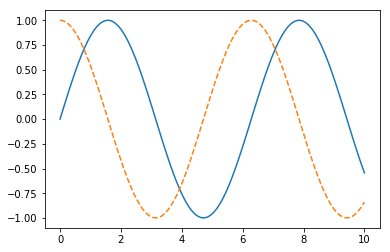

In [132]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--'); #se remarca ';' din final

Figurile se pot salva, la dorinta, pe disc:

In [133]:
fig.savefig('trigonometrie.png')
fig.savefig('trigonometrie.jpg')
fig.savefig('trigonometrie.eps')
fig.savefig('trigonometrie.pdf')

Tipurile de imagini in care se poate face salvarea sunt:

In [134]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Unul din stilurile de scriere foloseste interfata `plt` pentru desenare, inspirat din Matlab:

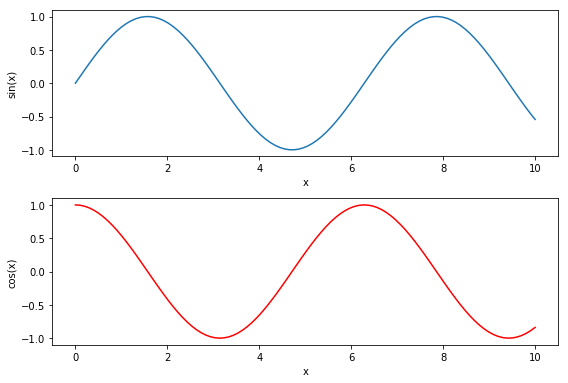

In [135]:
plt.figure(figsize = (8, 5)) # create a plot figure
# se creeaza primul grafic
plt.subplot(2, 1, 1) # (numar de 'linii' cu grafice, numar de 'coloane' cu grafice, numarul graficului care se deseneaza)
#etichete pe abscisa si ordonata
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.plot(x, np.sin(x))
plt.tight_layout() #pentru a se vedea legenda abscisei

# se creaza al doilea grafic
plt.subplot(2, 1, 2)
plt.xlabel('x')
plt.ylabel('cos(x)')
plt.plot(x, np.cos(x), 'r')
plt.show()

Al doilea stil este orientat pe obiecte:

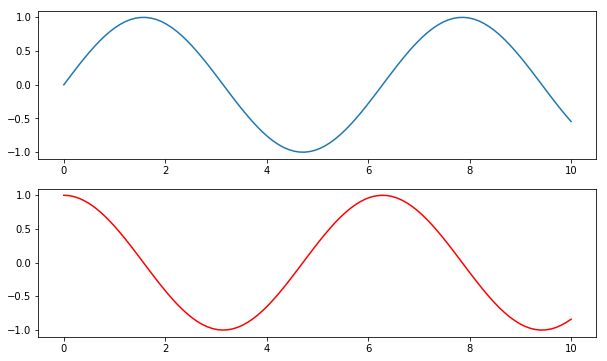

In [136]:
# se creeaza un grid pentru desenare
# ax va fi un tablou cu cele doua obiecte de tip Axe
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

# se apeleaza metoda plot() pe obiectul corespunzator
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x), 'r');

De regula, axele se auto-scaleaza pentru a cuprinde graficul desenat. Daca se vrea specificarea manuala a dimensiunii graficului, atunci:

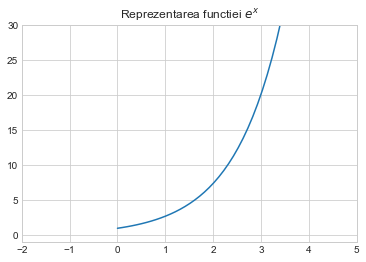

In [137]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.exp(x))
plt.xlim(-2, 5)
plt.ylim(-1, 30)
plt.title('Reprezentarea functiei $e^x$');